# Coding Exercise: Model Agnostic Meta Learning

For this tutorial, we will be showcasing use of Model Agnostic Meta Learning, to learn a simple curve of sinusoidal data. In second part of this tutorial, which can be found on github, we will learn about how to train MAML on Mini-Image Net.

Let's Begin!!!!

#### Step 1: Import Libraries 
Let's begin by importing some simple libraries

In [8]:
import math
import random
import torch
from torch import nn
from torch.nn import functional as F
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

#### Step 2: Create a simple neural network architecture, which is going to learn the sinusoidal curve. 
As mentioned above, we will be getting randomly generated data of sinusoidal curve so, we will be using this very small network, as we don't need a big one to learn a curve.

In [9]:
def net(x, params):
    x = F.linear(x, params[0], params[1])
    x = F.relu(x)

    x = F.linear(x, params[2], params[3])
    x = F.relu(x)

    x = F.linear(x, params[4], params[5])
    return x

params = [
    torch.Tensor(32, 1).uniform_(-1., 1.).requires_grad_(),
    torch.Tensor(32).zero_().requires_grad_(),

    torch.Tensor(32, 32).uniform_(-1./math.sqrt(32), 1./math.sqrt(32)).requires_grad_(),
    torch.Tensor(32).zero_().requires_grad_(),

    torch.Tensor(1, 32).uniform_(-1./math.sqrt(32), 1./math.sqrt(32)).requires_grad_(),
    torch.Tensor(1).zero_().requires_grad_(),
]

#### step 3: set up parameters for training 
so as we are going to use inner loop vs outer loop training as mentioned in MAML paper. thus, we need to set certain parameters such as alpha, beta, learning rate, optimizer, and number of loops.

In [10]:
opt = torch.optim.SGD(params, lr=1e-2)
n_inner_loop = 5
alpha = 3e-2

#### Step 4:  Implement Optimization Algorithm

In [11]:
for it in range(100000): # training for 1 million iterations
    b = 0 if random.choice([True, False]) else math.pi # setting up beta variable randomly
    
    #### Randomly obtain task 1 sinusoidal data ####
    x = torch.rand(4, 1)*4*math.pi - 2*math.pi
    y = torch.sin(x + b)
    
    #### Randomly obtain the task 2 sinusoidal data ####
    v_x = torch.rand(4, 1)*4*math.pi - 2*math.pi
    v_y = torch.sin(v_x + b)

    opt.zero_grad() # setup optimizer

    new_params = params # initialize weights for inner loop
    for k in range(n_inner_loop):
        f = net(x, new_params) # re-initialize task 2 neural network with new parameters
        loss = F.l1_loss(f, y) # set loss as L1 Loss

        # create_graph=True because computing grads here is part of the forward pass.
        # We want to differentiate through the SGD update steps and get higher order
        # derivatives in the backward pass.
        grads = torch.autograd.grad(loss, new_params, create_graph=True)
        new_params = [(new_params[i] - alpha*grads[i]) for i in range(len(params))] # update weights of inner loop

        if it % 100 == 0: 
            print ('Iteration %d -- Inner loop %d -- Loss: %.4f' % (it, k, loss))

    v_f = net(v_x, new_params) # re-initialize task 1 neural network with new parameters
    loss2 = F.l1_loss(v_f, v_y) # calculate Loss
    loss2.backward() # Backward Pass

    opt.step()

    if it % 100 == 0: 
        print ('Iteration %d -- Outer Loss: %.4f' % (it, loss2))



Iteration 0 -- Inner loop 0 -- Loss: 0.3558
Iteration 0 -- Inner loop 1 -- Loss: 0.3815
Iteration 0 -- Inner loop 2 -- Loss: 0.3788
Iteration 0 -- Inner loop 3 -- Loss: 0.3265
Iteration 0 -- Inner loop 4 -- Loss: 0.4066
Iteration 0 -- Outer Loss: 0.7631
Iteration 100 -- Inner loop 0 -- Loss: 0.9611
Iteration 100 -- Inner loop 1 -- Loss: 0.9364
Iteration 100 -- Inner loop 2 -- Loss: 0.9122
Iteration 100 -- Inner loop 3 -- Loss: 0.8883
Iteration 100 -- Inner loop 4 -- Loss: 0.8641
Iteration 100 -- Outer Loss: 1.0115
Iteration 200 -- Inner loop 0 -- Loss: 0.7295
Iteration 200 -- Inner loop 1 -- Loss: 0.7064
Iteration 200 -- Inner loop 2 -- Loss: 0.6832
Iteration 200 -- Inner loop 3 -- Loss: 0.6597
Iteration 200 -- Inner loop 4 -- Loss: 0.6356
Iteration 200 -- Outer Loss: 0.8210
Iteration 300 -- Inner loop 0 -- Loss: 0.6044
Iteration 300 -- Inner loop 1 -- Loss: 0.4955
Iteration 300 -- Inner loop 2 -- Loss: 0.3906
Iteration 300 -- Inner loop 3 -- Loss: 0.3694
Iteration 300 -- Inner loop 4 

Iteration 3100 -- Inner loop 0 -- Loss: 0.8219
Iteration 3100 -- Inner loop 1 -- Loss: 0.8056
Iteration 3100 -- Inner loop 2 -- Loss: 0.7892
Iteration 3100 -- Inner loop 3 -- Loss: 0.7721
Iteration 3100 -- Inner loop 4 -- Loss: 0.7544
Iteration 3100 -- Outer Loss: 0.8017
Iteration 3200 -- Inner loop 0 -- Loss: 0.5580
Iteration 3200 -- Inner loop 1 -- Loss: 0.5427
Iteration 3200 -- Inner loop 2 -- Loss: 0.5283
Iteration 3200 -- Inner loop 3 -- Loss: 0.5142
Iteration 3200 -- Inner loop 4 -- Loss: 0.5003
Iteration 3200 -- Outer Loss: 0.7128
Iteration 3300 -- Inner loop 0 -- Loss: 0.5483
Iteration 3300 -- Inner loop 1 -- Loss: 0.5472
Iteration 3300 -- Inner loop 2 -- Loss: 0.5462
Iteration 3300 -- Inner loop 3 -- Loss: 0.5452
Iteration 3300 -- Inner loop 4 -- Loss: 0.5441
Iteration 3300 -- Outer Loss: 0.3654
Iteration 3400 -- Inner loop 0 -- Loss: 0.5334
Iteration 3400 -- Inner loop 1 -- Loss: 0.4981
Iteration 3400 -- Inner loop 2 -- Loss: 0.4949
Iteration 3400 -- Inner loop 3 -- Loss: 0.4

Iteration 6200 -- Inner loop 0 -- Loss: 0.6972
Iteration 6200 -- Inner loop 1 -- Loss: 0.6717
Iteration 6200 -- Inner loop 2 -- Loss: 0.6460
Iteration 6200 -- Inner loop 3 -- Loss: 0.6200
Iteration 6200 -- Inner loop 4 -- Loss: 0.5935
Iteration 6200 -- Outer Loss: 0.7519
Iteration 6300 -- Inner loop 0 -- Loss: 0.4212
Iteration 6300 -- Inner loop 1 -- Loss: 0.3836
Iteration 6300 -- Inner loop 2 -- Loss: 0.3462
Iteration 6300 -- Inner loop 3 -- Loss: 0.3081
Iteration 6300 -- Inner loop 4 -- Loss: 0.2682
Iteration 6300 -- Outer Loss: 0.5457
Iteration 6400 -- Inner loop 0 -- Loss: 0.5550
Iteration 6400 -- Inner loop 1 -- Loss: 0.5392
Iteration 6400 -- Inner loop 2 -- Loss: 0.5230
Iteration 6400 -- Inner loop 3 -- Loss: 0.5064
Iteration 6400 -- Inner loop 4 -- Loss: 0.4894
Iteration 6400 -- Outer Loss: 0.3553
Iteration 6500 -- Inner loop 0 -- Loss: 0.4947
Iteration 6500 -- Inner loop 1 -- Loss: 0.3662
Iteration 6500 -- Inner loop 2 -- Loss: 0.3967
Iteration 6500 -- Inner loop 3 -- Loss: 0.4

Iteration 9300 -- Inner loop 0 -- Loss: 0.4002
Iteration 9300 -- Inner loop 1 -- Loss: 0.3419
Iteration 9300 -- Inner loop 2 -- Loss: 0.3066
Iteration 9300 -- Inner loop 3 -- Loss: 0.2700
Iteration 9300 -- Inner loop 4 -- Loss: 0.2669
Iteration 9300 -- Outer Loss: 0.7696
Iteration 9400 -- Inner loop 0 -- Loss: 0.3471
Iteration 9400 -- Inner loop 1 -- Loss: 0.3028
Iteration 9400 -- Inner loop 2 -- Loss: 0.3134
Iteration 9400 -- Inner loop 3 -- Loss: 0.3118
Iteration 9400 -- Inner loop 4 -- Loss: 0.2978
Iteration 9400 -- Outer Loss: 0.3054
Iteration 9500 -- Inner loop 0 -- Loss: 0.5700
Iteration 9500 -- Inner loop 1 -- Loss: 0.5377
Iteration 9500 -- Inner loop 2 -- Loss: 0.5049
Iteration 9500 -- Inner loop 3 -- Loss: 0.4712
Iteration 9500 -- Inner loop 4 -- Loss: 0.4360
Iteration 9500 -- Outer Loss: 0.2796
Iteration 9600 -- Inner loop 0 -- Loss: 0.7284
Iteration 9600 -- Inner loop 1 -- Loss: 0.7197
Iteration 9600 -- Inner loop 2 -- Loss: 0.7111
Iteration 9600 -- Inner loop 3 -- Loss: 0.7

Iteration 12300 -- Inner loop 0 -- Loss: 0.8017
Iteration 12300 -- Inner loop 1 -- Loss: 0.7817
Iteration 12300 -- Inner loop 2 -- Loss: 0.7617
Iteration 12300 -- Inner loop 3 -- Loss: 0.7416
Iteration 12300 -- Inner loop 4 -- Loss: 0.7214
Iteration 12300 -- Outer Loss: 0.7274
Iteration 12400 -- Inner loop 0 -- Loss: 0.4758
Iteration 12400 -- Inner loop 1 -- Loss: 0.4174
Iteration 12400 -- Inner loop 2 -- Loss: 0.3592
Iteration 12400 -- Inner loop 3 -- Loss: 0.3000
Iteration 12400 -- Inner loop 4 -- Loss: 0.2493
Iteration 12400 -- Outer Loss: 0.4526
Iteration 12500 -- Inner loop 0 -- Loss: 0.7143
Iteration 12500 -- Inner loop 1 -- Loss: 0.6655
Iteration 12500 -- Inner loop 2 -- Loss: 0.6162
Iteration 12500 -- Inner loop 3 -- Loss: 0.5659
Iteration 12500 -- Inner loop 4 -- Loss: 0.5139
Iteration 12500 -- Outer Loss: 0.4345
Iteration 12600 -- Inner loop 0 -- Loss: 0.5968
Iteration 12600 -- Inner loop 1 -- Loss: 0.5931
Iteration 12600 -- Inner loop 2 -- Loss: 0.5909
Iteration 12600 -- Inn

Iteration 15300 -- Inner loop 0 -- Loss: 0.8220
Iteration 15300 -- Inner loop 1 -- Loss: 0.7439
Iteration 15300 -- Inner loop 2 -- Loss: 0.6657
Iteration 15300 -- Inner loop 3 -- Loss: 0.5780
Iteration 15300 -- Inner loop 4 -- Loss: 0.5114
Iteration 15300 -- Outer Loss: 0.6180
Iteration 15400 -- Inner loop 0 -- Loss: 0.6991
Iteration 15400 -- Inner loop 1 -- Loss: 0.6111
Iteration 15400 -- Inner loop 2 -- Loss: 0.5169
Iteration 15400 -- Inner loop 3 -- Loss: 0.4113
Iteration 15400 -- Inner loop 4 -- Loss: 0.3980
Iteration 15400 -- Outer Loss: 0.5372
Iteration 15500 -- Inner loop 0 -- Loss: 0.7432
Iteration 15500 -- Inner loop 1 -- Loss: 0.5310
Iteration 15500 -- Inner loop 2 -- Loss: 0.4468
Iteration 15500 -- Inner loop 3 -- Loss: 0.4356
Iteration 15500 -- Inner loop 4 -- Loss: 0.4241
Iteration 15500 -- Outer Loss: 0.8090
Iteration 15600 -- Inner loop 0 -- Loss: 0.7687
Iteration 15600 -- Inner loop 1 -- Loss: 0.7304
Iteration 15600 -- Inner loop 2 -- Loss: 0.6930
Iteration 15600 -- Inn

Iteration 18300 -- Inner loop 0 -- Loss: 0.6404
Iteration 18300 -- Inner loop 1 -- Loss: 0.5628
Iteration 18300 -- Inner loop 2 -- Loss: 0.4926
Iteration 18300 -- Inner loop 3 -- Loss: 0.4254
Iteration 18300 -- Inner loop 4 -- Loss: 0.3603
Iteration 18300 -- Outer Loss: 0.5506
Iteration 18400 -- Inner loop 0 -- Loss: 0.8051
Iteration 18400 -- Inner loop 1 -- Loss: 0.7552
Iteration 18400 -- Inner loop 2 -- Loss: 0.7154
Iteration 18400 -- Inner loop 3 -- Loss: 0.6865
Iteration 18400 -- Inner loop 4 -- Loss: 0.6671
Iteration 18400 -- Outer Loss: 0.6174
Iteration 18500 -- Inner loop 0 -- Loss: 0.5623
Iteration 18500 -- Inner loop 1 -- Loss: 0.5213
Iteration 18500 -- Inner loop 2 -- Loss: 0.5261
Iteration 18500 -- Inner loop 3 -- Loss: 0.4956
Iteration 18500 -- Inner loop 4 -- Loss: 0.5009
Iteration 18500 -- Outer Loss: 0.6974
Iteration 18600 -- Inner loop 0 -- Loss: 0.5903
Iteration 18600 -- Inner loop 1 -- Loss: 0.5713
Iteration 18600 -- Inner loop 2 -- Loss: 0.5528
Iteration 18600 -- Inn

Iteration 21300 -- Inner loop 0 -- Loss: 0.6725
Iteration 21300 -- Inner loop 1 -- Loss: 0.3764
Iteration 21300 -- Inner loop 2 -- Loss: 0.2440
Iteration 21300 -- Inner loop 3 -- Loss: 0.1631
Iteration 21300 -- Inner loop 4 -- Loss: 0.3390
Iteration 21300 -- Outer Loss: 0.6597
Iteration 21400 -- Inner loop 0 -- Loss: 0.7022
Iteration 21400 -- Inner loop 1 -- Loss: 0.6313
Iteration 21400 -- Inner loop 2 -- Loss: 0.4934
Iteration 21400 -- Inner loop 3 -- Loss: 0.4355
Iteration 21400 -- Inner loop 4 -- Loss: 0.3098
Iteration 21400 -- Outer Loss: 0.6513
Iteration 21500 -- Inner loop 0 -- Loss: 1.0400
Iteration 21500 -- Inner loop 1 -- Loss: 0.8572
Iteration 21500 -- Inner loop 2 -- Loss: 0.6204
Iteration 21500 -- Inner loop 3 -- Loss: 0.4097
Iteration 21500 -- Inner loop 4 -- Loss: 0.2285
Iteration 21500 -- Outer Loss: 0.3186
Iteration 21600 -- Inner loop 0 -- Loss: 0.5177
Iteration 21600 -- Inner loop 1 -- Loss: 0.4627
Iteration 21600 -- Inner loop 2 -- Loss: 0.4075
Iteration 21600 -- Inn

Iteration 24300 -- Inner loop 0 -- Loss: 0.8692
Iteration 24300 -- Inner loop 1 -- Loss: 0.4195
Iteration 24300 -- Inner loop 2 -- Loss: 0.2834
Iteration 24300 -- Inner loop 3 -- Loss: 0.2825
Iteration 24300 -- Inner loop 4 -- Loss: 0.2083
Iteration 24300 -- Outer Loss: 0.5065
Iteration 24400 -- Inner loop 0 -- Loss: 0.5765
Iteration 24400 -- Inner loop 1 -- Loss: 0.3348
Iteration 24400 -- Inner loop 2 -- Loss: 0.2557
Iteration 24400 -- Inner loop 3 -- Loss: 0.1773
Iteration 24400 -- Inner loop 4 -- Loss: 0.2024
Iteration 24400 -- Outer Loss: 0.3336
Iteration 24500 -- Inner loop 0 -- Loss: 0.7046
Iteration 24500 -- Inner loop 1 -- Loss: 0.5292
Iteration 24500 -- Inner loop 2 -- Loss: 0.3777
Iteration 24500 -- Inner loop 3 -- Loss: 0.2569
Iteration 24500 -- Inner loop 4 -- Loss: 0.1767
Iteration 24500 -- Outer Loss: 0.2690
Iteration 24600 -- Inner loop 0 -- Loss: 0.5940
Iteration 24600 -- Inner loop 1 -- Loss: 0.3744
Iteration 24600 -- Inner loop 2 -- Loss: 0.3678
Iteration 24600 -- Inn

Iteration 27300 -- Inner loop 0 -- Loss: 0.5403
Iteration 27300 -- Inner loop 1 -- Loss: 0.5396
Iteration 27300 -- Inner loop 2 -- Loss: 0.2850
Iteration 27300 -- Inner loop 3 -- Loss: 0.1810
Iteration 27300 -- Inner loop 4 -- Loss: 0.0496
Iteration 27300 -- Outer Loss: 0.4584
Iteration 27400 -- Inner loop 0 -- Loss: 0.4787
Iteration 27400 -- Inner loop 1 -- Loss: 0.1458
Iteration 27400 -- Inner loop 2 -- Loss: 0.1227
Iteration 27400 -- Inner loop 3 -- Loss: 0.2443
Iteration 27400 -- Inner loop 4 -- Loss: 0.1022
Iteration 27400 -- Outer Loss: 0.3448
Iteration 27500 -- Inner loop 0 -- Loss: 0.6958
Iteration 27500 -- Inner loop 1 -- Loss: 0.1787
Iteration 27500 -- Inner loop 2 -- Loss: 0.1452
Iteration 27500 -- Inner loop 3 -- Loss: 0.1066
Iteration 27500 -- Inner loop 4 -- Loss: 0.1088
Iteration 27500 -- Outer Loss: 0.3438
Iteration 27600 -- Inner loop 0 -- Loss: 0.7453
Iteration 27600 -- Inner loop 1 -- Loss: 0.5760
Iteration 27600 -- Inner loop 2 -- Loss: 0.1215
Iteration 27600 -- Inn

Iteration 30300 -- Inner loop 0 -- Loss: 0.7155
Iteration 30300 -- Inner loop 1 -- Loss: 0.2738
Iteration 30300 -- Inner loop 2 -- Loss: 0.2007
Iteration 30300 -- Inner loop 3 -- Loss: 0.1461
Iteration 30300 -- Inner loop 4 -- Loss: 0.1270
Iteration 30300 -- Outer Loss: 0.3179
Iteration 30400 -- Inner loop 0 -- Loss: 0.2619
Iteration 30400 -- Inner loop 1 -- Loss: 0.1183
Iteration 30400 -- Inner loop 2 -- Loss: 0.0898
Iteration 30400 -- Inner loop 3 -- Loss: 0.0687
Iteration 30400 -- Inner loop 4 -- Loss: 0.1502
Iteration 30400 -- Outer Loss: 0.3286
Iteration 30500 -- Inner loop 0 -- Loss: 0.6408
Iteration 30500 -- Inner loop 1 -- Loss: 0.1169
Iteration 30500 -- Inner loop 2 -- Loss: 0.0732
Iteration 30500 -- Inner loop 3 -- Loss: 0.1136
Iteration 30500 -- Inner loop 4 -- Loss: 0.0750
Iteration 30500 -- Outer Loss: 0.1442
Iteration 30600 -- Inner loop 0 -- Loss: 0.5141
Iteration 30600 -- Inner loop 1 -- Loss: 0.1422
Iteration 30600 -- Inner loop 2 -- Loss: 0.0961
Iteration 30600 -- Inn

Iteration 33300 -- Inner loop 0 -- Loss: 0.9520
Iteration 33300 -- Inner loop 1 -- Loss: 0.2783
Iteration 33300 -- Inner loop 2 -- Loss: 0.2403
Iteration 33300 -- Inner loop 3 -- Loss: 0.1566
Iteration 33300 -- Inner loop 4 -- Loss: 0.0949
Iteration 33300 -- Outer Loss: 0.1373
Iteration 33400 -- Inner loop 0 -- Loss: 0.9948
Iteration 33400 -- Inner loop 1 -- Loss: 0.1672
Iteration 33400 -- Inner loop 2 -- Loss: 0.2067
Iteration 33400 -- Inner loop 3 -- Loss: 0.1613
Iteration 33400 -- Inner loop 4 -- Loss: 0.1135
Iteration 33400 -- Outer Loss: 0.0774
Iteration 33500 -- Inner loop 0 -- Loss: 0.1454
Iteration 33500 -- Inner loop 1 -- Loss: 0.2408
Iteration 33500 -- Inner loop 2 -- Loss: 0.4608
Iteration 33500 -- Inner loop 3 -- Loss: 0.2208
Iteration 33500 -- Inner loop 4 -- Loss: 0.1772
Iteration 33500 -- Outer Loss: 0.2420
Iteration 33600 -- Inner loop 0 -- Loss: 0.3934
Iteration 33600 -- Inner loop 1 -- Loss: 0.1401
Iteration 33600 -- Inner loop 2 -- Loss: 0.0660
Iteration 33600 -- Inn

Iteration 36300 -- Inner loop 0 -- Loss: 0.5206
Iteration 36300 -- Inner loop 1 -- Loss: 0.4327
Iteration 36300 -- Inner loop 2 -- Loss: 0.3229
Iteration 36300 -- Inner loop 3 -- Loss: 0.3059
Iteration 36300 -- Inner loop 4 -- Loss: 0.2096
Iteration 36300 -- Outer Loss: 0.1089
Iteration 36400 -- Inner loop 0 -- Loss: 0.3029
Iteration 36400 -- Inner loop 1 -- Loss: 0.2723
Iteration 36400 -- Inner loop 2 -- Loss: 0.2194
Iteration 36400 -- Inner loop 3 -- Loss: 0.1870
Iteration 36400 -- Inner loop 4 -- Loss: 0.1782
Iteration 36400 -- Outer Loss: 0.1932
Iteration 36500 -- Inner loop 0 -- Loss: 0.6538
Iteration 36500 -- Inner loop 1 -- Loss: 0.1148
Iteration 36500 -- Inner loop 2 -- Loss: 0.4333
Iteration 36500 -- Inner loop 3 -- Loss: 0.1085
Iteration 36500 -- Inner loop 4 -- Loss: 0.1527
Iteration 36500 -- Outer Loss: 0.1455
Iteration 36600 -- Inner loop 0 -- Loss: 0.7336
Iteration 36600 -- Inner loop 1 -- Loss: 0.2063
Iteration 36600 -- Inner loop 2 -- Loss: 0.1058
Iteration 36600 -- Inn

Iteration 39300 -- Inner loop 0 -- Loss: 0.9002
Iteration 39300 -- Inner loop 1 -- Loss: 0.2523
Iteration 39300 -- Inner loop 2 -- Loss: 0.1675
Iteration 39300 -- Inner loop 3 -- Loss: 0.1868
Iteration 39300 -- Inner loop 4 -- Loss: 0.1445
Iteration 39300 -- Outer Loss: 0.2138
Iteration 39400 -- Inner loop 0 -- Loss: 0.9665
Iteration 39400 -- Inner loop 1 -- Loss: 0.5935
Iteration 39400 -- Inner loop 2 -- Loss: 0.2036
Iteration 39400 -- Inner loop 3 -- Loss: 0.1541
Iteration 39400 -- Inner loop 4 -- Loss: 0.0874
Iteration 39400 -- Outer Loss: 0.1537
Iteration 39500 -- Inner loop 0 -- Loss: 1.4541
Iteration 39500 -- Inner loop 1 -- Loss: 0.1170
Iteration 39500 -- Inner loop 2 -- Loss: 0.0171
Iteration 39500 -- Inner loop 3 -- Loss: 0.0885
Iteration 39500 -- Inner loop 4 -- Loss: 0.0151
Iteration 39500 -- Outer Loss: 0.1229
Iteration 39600 -- Inner loop 0 -- Loss: 0.6312
Iteration 39600 -- Inner loop 1 -- Loss: 0.0494
Iteration 39600 -- Inner loop 2 -- Loss: 0.1382
Iteration 39600 -- Inn

Iteration 42300 -- Inner loop 0 -- Loss: 0.4094
Iteration 42300 -- Inner loop 1 -- Loss: 0.2905
Iteration 42300 -- Inner loop 2 -- Loss: 0.3578
Iteration 42300 -- Inner loop 3 -- Loss: 0.1849
Iteration 42300 -- Inner loop 4 -- Loss: 0.3879
Iteration 42300 -- Outer Loss: 0.2305
Iteration 42400 -- Inner loop 0 -- Loss: 0.2029
Iteration 42400 -- Inner loop 1 -- Loss: 0.0343
Iteration 42400 -- Inner loop 2 -- Loss: 0.2238
Iteration 42400 -- Inner loop 3 -- Loss: 0.0349
Iteration 42400 -- Inner loop 4 -- Loss: 0.2162
Iteration 42400 -- Outer Loss: 0.0536
Iteration 42500 -- Inner loop 0 -- Loss: 0.7599
Iteration 42500 -- Inner loop 1 -- Loss: 0.1131
Iteration 42500 -- Inner loop 2 -- Loss: 0.0817
Iteration 42500 -- Inner loop 3 -- Loss: 0.0537
Iteration 42500 -- Inner loop 4 -- Loss: 0.0779
Iteration 42500 -- Outer Loss: 0.1192
Iteration 42600 -- Inner loop 0 -- Loss: 0.8999
Iteration 42600 -- Inner loop 1 -- Loss: 0.1417
Iteration 42600 -- Inner loop 2 -- Loss: 0.0910
Iteration 42600 -- Inn

Iteration 45300 -- Inner loop 0 -- Loss: 0.2380
Iteration 45300 -- Inner loop 1 -- Loss: 0.0976
Iteration 45300 -- Inner loop 2 -- Loss: 0.1841
Iteration 45300 -- Inner loop 3 -- Loss: 0.1603
Iteration 45300 -- Inner loop 4 -- Loss: 0.1833
Iteration 45300 -- Outer Loss: 0.0621
Iteration 45400 -- Inner loop 0 -- Loss: 0.7992
Iteration 45400 -- Inner loop 1 -- Loss: 0.0567
Iteration 45400 -- Inner loop 2 -- Loss: 0.0459
Iteration 45400 -- Inner loop 3 -- Loss: 0.0295
Iteration 45400 -- Inner loop 4 -- Loss: 0.0731
Iteration 45400 -- Outer Loss: 0.2653
Iteration 45500 -- Inner loop 0 -- Loss: 0.5982
Iteration 45500 -- Inner loop 1 -- Loss: 0.2293
Iteration 45500 -- Inner loop 2 -- Loss: 0.0913
Iteration 45500 -- Inner loop 3 -- Loss: 0.0111
Iteration 45500 -- Inner loop 4 -- Loss: 0.1426
Iteration 45500 -- Outer Loss: 0.0525
Iteration 45600 -- Inner loop 0 -- Loss: 0.5110
Iteration 45600 -- Inner loop 1 -- Loss: 0.2729
Iteration 45600 -- Inner loop 2 -- Loss: 0.1087
Iteration 45600 -- Inn

Iteration 48300 -- Inner loop 0 -- Loss: 0.7412
Iteration 48300 -- Inner loop 1 -- Loss: 0.1006
Iteration 48300 -- Inner loop 2 -- Loss: 0.1261
Iteration 48300 -- Inner loop 3 -- Loss: 0.1067
Iteration 48300 -- Inner loop 4 -- Loss: 0.1152
Iteration 48300 -- Outer Loss: 0.1197
Iteration 48400 -- Inner loop 0 -- Loss: 0.3516
Iteration 48400 -- Inner loop 1 -- Loss: 0.2665
Iteration 48400 -- Inner loop 2 -- Loss: 0.1061
Iteration 48400 -- Inner loop 3 -- Loss: 0.2398
Iteration 48400 -- Inner loop 4 -- Loss: 0.0484
Iteration 48400 -- Outer Loss: 0.2034
Iteration 48500 -- Inner loop 0 -- Loss: 0.1759
Iteration 48500 -- Inner loop 1 -- Loss: 0.1274
Iteration 48500 -- Inner loop 2 -- Loss: 0.1088
Iteration 48500 -- Inner loop 3 -- Loss: 0.1938
Iteration 48500 -- Inner loop 4 -- Loss: 0.5554
Iteration 48500 -- Outer Loss: 0.0642
Iteration 48600 -- Inner loop 0 -- Loss: 0.2549
Iteration 48600 -- Inner loop 1 -- Loss: 0.0503
Iteration 48600 -- Inner loop 2 -- Loss: 0.1209
Iteration 48600 -- Inn

Iteration 51300 -- Inner loop 0 -- Loss: 0.7590
Iteration 51300 -- Inner loop 1 -- Loss: 0.0524
Iteration 51300 -- Inner loop 2 -- Loss: 0.1243
Iteration 51300 -- Inner loop 3 -- Loss: 0.0604
Iteration 51300 -- Inner loop 4 -- Loss: 0.1228
Iteration 51300 -- Outer Loss: 0.1665
Iteration 51400 -- Inner loop 0 -- Loss: 0.4658
Iteration 51400 -- Inner loop 1 -- Loss: 0.1362
Iteration 51400 -- Inner loop 2 -- Loss: 0.0960
Iteration 51400 -- Inner loop 3 -- Loss: 0.0701
Iteration 51400 -- Inner loop 4 -- Loss: 0.1480
Iteration 51400 -- Outer Loss: 0.0449
Iteration 51500 -- Inner loop 0 -- Loss: 1.0385
Iteration 51500 -- Inner loop 1 -- Loss: 0.6377
Iteration 51500 -- Inner loop 2 -- Loss: 0.2407
Iteration 51500 -- Inner loop 3 -- Loss: 0.0928
Iteration 51500 -- Inner loop 4 -- Loss: 0.1153
Iteration 51500 -- Outer Loss: 0.0687
Iteration 51600 -- Inner loop 0 -- Loss: 0.8255
Iteration 51600 -- Inner loop 1 -- Loss: 0.0913
Iteration 51600 -- Inner loop 2 -- Loss: 0.1236
Iteration 51600 -- Inn

Iteration 54300 -- Inner loop 0 -- Loss: 0.9394
Iteration 54300 -- Inner loop 1 -- Loss: 0.1662
Iteration 54300 -- Inner loop 2 -- Loss: 0.1795
Iteration 54300 -- Inner loop 3 -- Loss: 0.1838
Iteration 54300 -- Inner loop 4 -- Loss: 0.1385
Iteration 54300 -- Outer Loss: 0.1933
Iteration 54400 -- Inner loop 0 -- Loss: 0.3109
Iteration 54400 -- Inner loop 1 -- Loss: 0.3889
Iteration 54400 -- Inner loop 2 -- Loss: 0.1007
Iteration 54400 -- Inner loop 3 -- Loss: 0.4809
Iteration 54400 -- Inner loop 4 -- Loss: 0.0853
Iteration 54400 -- Outer Loss: 0.2421
Iteration 54500 -- Inner loop 0 -- Loss: 0.7293
Iteration 54500 -- Inner loop 1 -- Loss: 0.1599
Iteration 54500 -- Inner loop 2 -- Loss: 0.1151
Iteration 54500 -- Inner loop 3 -- Loss: 0.0752
Iteration 54500 -- Inner loop 4 -- Loss: 0.1233
Iteration 54500 -- Outer Loss: 0.0693
Iteration 54600 -- Inner loop 0 -- Loss: 0.8290
Iteration 54600 -- Inner loop 1 -- Loss: 0.1553
Iteration 54600 -- Inner loop 2 -- Loss: 0.0748
Iteration 54600 -- Inn

Iteration 57300 -- Inner loop 0 -- Loss: 0.8838
Iteration 57300 -- Inner loop 1 -- Loss: 0.3011
Iteration 57300 -- Inner loop 2 -- Loss: 0.2335
Iteration 57300 -- Inner loop 3 -- Loss: 0.1476
Iteration 57300 -- Inner loop 4 -- Loss: 0.2065
Iteration 57300 -- Outer Loss: 0.2173
Iteration 57400 -- Inner loop 0 -- Loss: 0.6758
Iteration 57400 -- Inner loop 1 -- Loss: 0.1036
Iteration 57400 -- Inner loop 2 -- Loss: 0.1125
Iteration 57400 -- Inner loop 3 -- Loss: 0.1102
Iteration 57400 -- Inner loop 4 -- Loss: 0.0772
Iteration 57400 -- Outer Loss: 0.0908
Iteration 57500 -- Inner loop 0 -- Loss: 1.1866
Iteration 57500 -- Inner loop 1 -- Loss: 0.9811
Iteration 57500 -- Inner loop 2 -- Loss: 0.8405
Iteration 57500 -- Inner loop 3 -- Loss: 0.7159
Iteration 57500 -- Inner loop 4 -- Loss: 0.5919
Iteration 57500 -- Outer Loss: 1.2271
Iteration 57600 -- Inner loop 0 -- Loss: 0.9988
Iteration 57600 -- Inner loop 1 -- Loss: 0.1932
Iteration 57600 -- Inner loop 2 -- Loss: 0.1709
Iteration 57600 -- Inn

Iteration 60300 -- Inner loop 0 -- Loss: 0.1732
Iteration 60300 -- Inner loop 1 -- Loss: 0.0366
Iteration 60300 -- Inner loop 2 -- Loss: 0.0981
Iteration 60300 -- Inner loop 3 -- Loss: 0.1059
Iteration 60300 -- Inner loop 4 -- Loss: 0.0986
Iteration 60300 -- Outer Loss: 0.1775
Iteration 60400 -- Inner loop 0 -- Loss: 0.2727
Iteration 60400 -- Inner loop 1 -- Loss: 0.1051
Iteration 60400 -- Inner loop 2 -- Loss: 0.1229
Iteration 60400 -- Inner loop 3 -- Loss: 0.1026
Iteration 60400 -- Inner loop 4 -- Loss: 0.1076
Iteration 60400 -- Outer Loss: 0.0904
Iteration 60500 -- Inner loop 0 -- Loss: 1.0716
Iteration 60500 -- Inner loop 1 -- Loss: 0.0387
Iteration 60500 -- Inner loop 2 -- Loss: 0.3194
Iteration 60500 -- Inner loop 3 -- Loss: 0.0507
Iteration 60500 -- Inner loop 4 -- Loss: 0.2990
Iteration 60500 -- Outer Loss: 0.0894
Iteration 60600 -- Inner loop 0 -- Loss: 0.5251
Iteration 60600 -- Inner loop 1 -- Loss: 0.1252
Iteration 60600 -- Inner loop 2 -- Loss: 0.1092
Iteration 60600 -- Inn

Iteration 63300 -- Inner loop 0 -- Loss: 0.4262
Iteration 63300 -- Inner loop 1 -- Loss: 0.1823
Iteration 63300 -- Inner loop 2 -- Loss: 0.3910
Iteration 63300 -- Inner loop 3 -- Loss: 0.0957
Iteration 63300 -- Inner loop 4 -- Loss: 0.1178
Iteration 63300 -- Outer Loss: 0.1810
Iteration 63400 -- Inner loop 0 -- Loss: 1.1736
Iteration 63400 -- Inner loop 1 -- Loss: 0.5204
Iteration 63400 -- Inner loop 2 -- Loss: 0.1506
Iteration 63400 -- Inner loop 3 -- Loss: 0.0955
Iteration 63400 -- Inner loop 4 -- Loss: 0.1301
Iteration 63400 -- Outer Loss: 0.0570
Iteration 63500 -- Inner loop 0 -- Loss: 0.7729
Iteration 63500 -- Inner loop 1 -- Loss: 0.1281
Iteration 63500 -- Inner loop 2 -- Loss: 0.1111
Iteration 63500 -- Inner loop 3 -- Loss: 0.0962
Iteration 63500 -- Inner loop 4 -- Loss: 0.0914
Iteration 63500 -- Outer Loss: 0.1516
Iteration 63600 -- Inner loop 0 -- Loss: 0.6153
Iteration 63600 -- Inner loop 1 -- Loss: 0.0587
Iteration 63600 -- Inner loop 2 -- Loss: 0.0422
Iteration 63600 -- Inn

Iteration 66300 -- Inner loop 0 -- Loss: 0.4013
Iteration 66300 -- Inner loop 1 -- Loss: 0.1197
Iteration 66300 -- Inner loop 2 -- Loss: 0.0678
Iteration 66300 -- Inner loop 3 -- Loss: 0.0652
Iteration 66300 -- Inner loop 4 -- Loss: 0.0738
Iteration 66300 -- Outer Loss: 0.0701
Iteration 66400 -- Inner loop 0 -- Loss: 0.7211
Iteration 66400 -- Inner loop 1 -- Loss: 0.1683
Iteration 66400 -- Inner loop 2 -- Loss: 0.1804
Iteration 66400 -- Inner loop 3 -- Loss: 0.1588
Iteration 66400 -- Inner loop 4 -- Loss: 0.1782
Iteration 66400 -- Outer Loss: 0.1854
Iteration 66500 -- Inner loop 0 -- Loss: 0.6365
Iteration 66500 -- Inner loop 1 -- Loss: 0.4673
Iteration 66500 -- Inner loop 2 -- Loss: 0.1301
Iteration 66500 -- Inner loop 3 -- Loss: 0.1723
Iteration 66500 -- Inner loop 4 -- Loss: 0.1214
Iteration 66500 -- Outer Loss: 0.2039
Iteration 66600 -- Inner loop 0 -- Loss: 0.5811
Iteration 66600 -- Inner loop 1 -- Loss: 0.0900
Iteration 66600 -- Inner loop 2 -- Loss: 0.0297
Iteration 66600 -- Inn

Iteration 69300 -- Inner loop 0 -- Loss: 0.7124
Iteration 69300 -- Inner loop 1 -- Loss: 0.2636
Iteration 69300 -- Inner loop 2 -- Loss: 0.1197
Iteration 69300 -- Inner loop 3 -- Loss: 0.0720
Iteration 69300 -- Inner loop 4 -- Loss: 0.1178
Iteration 69300 -- Outer Loss: 0.0597
Iteration 69400 -- Inner loop 0 -- Loss: 0.6901
Iteration 69400 -- Inner loop 1 -- Loss: 0.0462
Iteration 69400 -- Inner loop 2 -- Loss: 0.1251
Iteration 69400 -- Inner loop 3 -- Loss: 0.1046
Iteration 69400 -- Inner loop 4 -- Loss: 0.1286
Iteration 69400 -- Outer Loss: 0.1848
Iteration 69500 -- Inner loop 0 -- Loss: 0.4842
Iteration 69500 -- Inner loop 1 -- Loss: 0.1842
Iteration 69500 -- Inner loop 2 -- Loss: 0.0967
Iteration 69500 -- Inner loop 3 -- Loss: 0.1875
Iteration 69500 -- Inner loop 4 -- Loss: 0.0376
Iteration 69500 -- Outer Loss: 0.0196
Iteration 69600 -- Inner loop 0 -- Loss: 0.4984
Iteration 69600 -- Inner loop 1 -- Loss: 0.0499
Iteration 69600 -- Inner loop 2 -- Loss: 0.0751
Iteration 69600 -- Inn

Iteration 72300 -- Inner loop 0 -- Loss: 0.8022
Iteration 72300 -- Inner loop 1 -- Loss: 0.4616
Iteration 72300 -- Inner loop 2 -- Loss: 0.2252
Iteration 72300 -- Inner loop 3 -- Loss: 0.2211
Iteration 72300 -- Inner loop 4 -- Loss: 0.1609
Iteration 72300 -- Outer Loss: 0.0969
Iteration 72400 -- Inner loop 0 -- Loss: 0.3117
Iteration 72400 -- Inner loop 1 -- Loss: 0.0869
Iteration 72400 -- Inner loop 2 -- Loss: 0.0851
Iteration 72400 -- Inner loop 3 -- Loss: 0.0856
Iteration 72400 -- Inner loop 4 -- Loss: 0.0840
Iteration 72400 -- Outer Loss: 0.1086
Iteration 72500 -- Inner loop 0 -- Loss: 0.7627
Iteration 72500 -- Inner loop 1 -- Loss: 0.1806
Iteration 72500 -- Inner loop 2 -- Loss: 0.0431
Iteration 72500 -- Inner loop 3 -- Loss: 0.0723
Iteration 72500 -- Inner loop 4 -- Loss: 0.0824
Iteration 72500 -- Outer Loss: 0.0238
Iteration 72600 -- Inner loop 0 -- Loss: 0.8791
Iteration 72600 -- Inner loop 1 -- Loss: 0.0343
Iteration 72600 -- Inner loop 2 -- Loss: 0.0729
Iteration 72600 -- Inn

Iteration 75300 -- Inner loop 0 -- Loss: 0.5101
Iteration 75300 -- Inner loop 1 -- Loss: 0.0827
Iteration 75300 -- Inner loop 2 -- Loss: 0.1033
Iteration 75300 -- Inner loop 3 -- Loss: 0.1286
Iteration 75300 -- Inner loop 4 -- Loss: 0.0883
Iteration 75300 -- Outer Loss: 0.2167
Iteration 75400 -- Inner loop 0 -- Loss: 0.5804
Iteration 75400 -- Inner loop 1 -- Loss: 0.2425
Iteration 75400 -- Inner loop 2 -- Loss: 0.1100
Iteration 75400 -- Inner loop 3 -- Loss: 0.1183
Iteration 75400 -- Inner loop 4 -- Loss: 0.1013
Iteration 75400 -- Outer Loss: 0.1521
Iteration 75500 -- Inner loop 0 -- Loss: 0.9413
Iteration 75500 -- Inner loop 1 -- Loss: 0.0671
Iteration 75500 -- Inner loop 2 -- Loss: 0.0671
Iteration 75500 -- Inner loop 3 -- Loss: 0.0703
Iteration 75500 -- Inner loop 4 -- Loss: 0.0568
Iteration 75500 -- Outer Loss: 0.0555
Iteration 75600 -- Inner loop 0 -- Loss: 0.5746
Iteration 75600 -- Inner loop 1 -- Loss: 0.1030
Iteration 75600 -- Inner loop 2 -- Loss: 0.1968
Iteration 75600 -- Inn

Iteration 78300 -- Inner loop 0 -- Loss: 1.0651
Iteration 78300 -- Inner loop 1 -- Loss: 0.0619
Iteration 78300 -- Inner loop 2 -- Loss: 0.1372
Iteration 78300 -- Inner loop 3 -- Loss: 0.1270
Iteration 78300 -- Inner loop 4 -- Loss: 0.1087
Iteration 78300 -- Outer Loss: 0.1487
Iteration 78400 -- Inner loop 0 -- Loss: 1.0616
Iteration 78400 -- Inner loop 1 -- Loss: 0.1534
Iteration 78400 -- Inner loop 2 -- Loss: 0.0688
Iteration 78400 -- Inner loop 3 -- Loss: 0.0974
Iteration 78400 -- Inner loop 4 -- Loss: 0.0805
Iteration 78400 -- Outer Loss: 0.0627
Iteration 78500 -- Inner loop 0 -- Loss: 0.2360
Iteration 78500 -- Inner loop 1 -- Loss: 0.0950
Iteration 78500 -- Inner loop 2 -- Loss: 0.1851
Iteration 78500 -- Inner loop 3 -- Loss: 0.0734
Iteration 78500 -- Inner loop 4 -- Loss: 0.1664
Iteration 78500 -- Outer Loss: 0.0745
Iteration 78600 -- Inner loop 0 -- Loss: 1.0237
Iteration 78600 -- Inner loop 1 -- Loss: 0.2798
Iteration 78600 -- Inner loop 2 -- Loss: 0.1691
Iteration 78600 -- Inn

Iteration 81300 -- Inner loop 0 -- Loss: 0.5383
Iteration 81300 -- Inner loop 1 -- Loss: 0.1346
Iteration 81300 -- Inner loop 2 -- Loss: 0.1518
Iteration 81300 -- Inner loop 3 -- Loss: 0.1369
Iteration 81300 -- Inner loop 4 -- Loss: 0.1421
Iteration 81300 -- Outer Loss: 0.0691
Iteration 81400 -- Inner loop 0 -- Loss: 1.2222
Iteration 81400 -- Inner loop 1 -- Loss: 0.1164
Iteration 81400 -- Inner loop 2 -- Loss: 0.0780
Iteration 81400 -- Inner loop 3 -- Loss: 0.0363
Iteration 81400 -- Inner loop 4 -- Loss: 0.0327
Iteration 81400 -- Outer Loss: 0.0247
Iteration 81500 -- Inner loop 0 -- Loss: 0.1701
Iteration 81500 -- Inner loop 1 -- Loss: 0.3007
Iteration 81500 -- Inner loop 2 -- Loss: 0.2795
Iteration 81500 -- Inner loop 3 -- Loss: 0.0994
Iteration 81500 -- Inner loop 4 -- Loss: 0.0654
Iteration 81500 -- Outer Loss: 0.2333
Iteration 81600 -- Inner loop 0 -- Loss: 0.6077
Iteration 81600 -- Inner loop 1 -- Loss: 0.0530
Iteration 81600 -- Inner loop 2 -- Loss: 0.0635
Iteration 81600 -- Inn

Iteration 84300 -- Inner loop 0 -- Loss: 1.2553
Iteration 84300 -- Inner loop 1 -- Loss: 0.0959
Iteration 84300 -- Inner loop 2 -- Loss: 0.2005
Iteration 84300 -- Inner loop 3 -- Loss: 0.1665
Iteration 84300 -- Inner loop 4 -- Loss: 0.0836
Iteration 84300 -- Outer Loss: 0.0760
Iteration 84400 -- Inner loop 0 -- Loss: 0.7243
Iteration 84400 -- Inner loop 1 -- Loss: 0.1340
Iteration 84400 -- Inner loop 2 -- Loss: 0.0740
Iteration 84400 -- Inner loop 3 -- Loss: 0.0960
Iteration 84400 -- Inner loop 4 -- Loss: 0.0965
Iteration 84400 -- Outer Loss: 0.1203
Iteration 84500 -- Inner loop 0 -- Loss: 1.1533
Iteration 84500 -- Inner loop 1 -- Loss: 0.1160
Iteration 84500 -- Inner loop 2 -- Loss: 0.0672
Iteration 84500 -- Inner loop 3 -- Loss: 0.0398
Iteration 84500 -- Inner loop 4 -- Loss: 0.0421
Iteration 84500 -- Outer Loss: 0.2103
Iteration 84600 -- Inner loop 0 -- Loss: 0.9546
Iteration 84600 -- Inner loop 1 -- Loss: 0.1165
Iteration 84600 -- Inner loop 2 -- Loss: 0.1520
Iteration 84600 -- Inn

Iteration 87300 -- Inner loop 0 -- Loss: 1.0230
Iteration 87300 -- Inner loop 1 -- Loss: 0.3834
Iteration 87300 -- Inner loop 2 -- Loss: 0.1233
Iteration 87300 -- Inner loop 3 -- Loss: 0.0587
Iteration 87300 -- Inner loop 4 -- Loss: 0.0819
Iteration 87300 -- Outer Loss: 0.0629
Iteration 87400 -- Inner loop 0 -- Loss: 0.4011
Iteration 87400 -- Inner loop 1 -- Loss: 0.1659
Iteration 87400 -- Inner loop 2 -- Loss: 0.0336
Iteration 87400 -- Inner loop 3 -- Loss: 0.0744
Iteration 87400 -- Inner loop 4 -- Loss: 0.0298
Iteration 87400 -- Outer Loss: 0.1498
Iteration 87500 -- Inner loop 0 -- Loss: 1.0355
Iteration 87500 -- Inner loop 1 -- Loss: 0.5279
Iteration 87500 -- Inner loop 2 -- Loss: 0.2129
Iteration 87500 -- Inner loop 3 -- Loss: 0.1676
Iteration 87500 -- Inner loop 4 -- Loss: 0.1020
Iteration 87500 -- Outer Loss: 0.0820
Iteration 87600 -- Inner loop 0 -- Loss: 0.2664
Iteration 87600 -- Inner loop 1 -- Loss: 0.1656
Iteration 87600 -- Inner loop 2 -- Loss: 0.1545
Iteration 87600 -- Inn

Iteration 90300 -- Inner loop 0 -- Loss: 0.4943
Iteration 90300 -- Inner loop 1 -- Loss: 0.1272
Iteration 90300 -- Inner loop 2 -- Loss: 0.0119
Iteration 90300 -- Inner loop 3 -- Loss: 0.1180
Iteration 90300 -- Inner loop 4 -- Loss: 0.0175
Iteration 90300 -- Outer Loss: 0.1492
Iteration 90400 -- Inner loop 0 -- Loss: 0.7816
Iteration 90400 -- Inner loop 1 -- Loss: 0.0852
Iteration 90400 -- Inner loop 2 -- Loss: 0.1648
Iteration 90400 -- Inner loop 3 -- Loss: 0.0502
Iteration 90400 -- Inner loop 4 -- Loss: 0.2191
Iteration 90400 -- Outer Loss: 0.2593
Iteration 90500 -- Inner loop 0 -- Loss: 1.2258
Iteration 90500 -- Inner loop 1 -- Loss: 0.6048
Iteration 90500 -- Inner loop 2 -- Loss: 0.0920
Iteration 90500 -- Inner loop 3 -- Loss: 0.0284
Iteration 90500 -- Inner loop 4 -- Loss: 0.0831
Iteration 90500 -- Outer Loss: 0.1039
Iteration 90600 -- Inner loop 0 -- Loss: 0.9181
Iteration 90600 -- Inner loop 1 -- Loss: 0.0529
Iteration 90600 -- Inner loop 2 -- Loss: 0.2830
Iteration 90600 -- Inn

Iteration 93300 -- Inner loop 0 -- Loss: 0.8239
Iteration 93300 -- Inner loop 1 -- Loss: 0.0399
Iteration 93300 -- Inner loop 2 -- Loss: 0.1413
Iteration 93300 -- Inner loop 3 -- Loss: 0.0474
Iteration 93300 -- Inner loop 4 -- Loss: 0.0924
Iteration 93300 -- Outer Loss: 0.0750
Iteration 93400 -- Inner loop 0 -- Loss: 0.2409
Iteration 93400 -- Inner loop 1 -- Loss: 0.1377
Iteration 93400 -- Inner loop 2 -- Loss: 0.0445
Iteration 93400 -- Inner loop 3 -- Loss: 0.0687
Iteration 93400 -- Inner loop 4 -- Loss: 0.0486
Iteration 93400 -- Outer Loss: 0.1600
Iteration 93500 -- Inner loop 0 -- Loss: 0.6519
Iteration 93500 -- Inner loop 1 -- Loss: 0.1201
Iteration 93500 -- Inner loop 2 -- Loss: 0.1086
Iteration 93500 -- Inner loop 3 -- Loss: 0.0706
Iteration 93500 -- Inner loop 4 -- Loss: 0.1201
Iteration 93500 -- Outer Loss: 0.0796
Iteration 93600 -- Inner loop 0 -- Loss: 1.2142
Iteration 93600 -- Inner loop 1 -- Loss: 1.0270
Iteration 93600 -- Inner loop 2 -- Loss: 0.4939
Iteration 93600 -- Inn

Iteration 96300 -- Inner loop 0 -- Loss: 0.8601
Iteration 96300 -- Inner loop 1 -- Loss: 0.5638
Iteration 96300 -- Inner loop 2 -- Loss: 0.1987
Iteration 96300 -- Inner loop 3 -- Loss: 0.1694
Iteration 96300 -- Inner loop 4 -- Loss: 0.0485
Iteration 96300 -- Outer Loss: 0.2397
Iteration 96400 -- Inner loop 0 -- Loss: 0.3946
Iteration 96400 -- Inner loop 1 -- Loss: 0.1698
Iteration 96400 -- Inner loop 2 -- Loss: 0.0570
Iteration 96400 -- Inner loop 3 -- Loss: 0.1628
Iteration 96400 -- Inner loop 4 -- Loss: 0.0462
Iteration 96400 -- Outer Loss: 0.2912
Iteration 96500 -- Inner loop 0 -- Loss: 0.8298
Iteration 96500 -- Inner loop 1 -- Loss: 0.1146
Iteration 96500 -- Inner loop 2 -- Loss: 0.1381
Iteration 96500 -- Inner loop 3 -- Loss: 0.1376
Iteration 96500 -- Inner loop 4 -- Loss: 0.1025
Iteration 96500 -- Outer Loss: 0.1784
Iteration 96600 -- Inner loop 0 -- Loss: 0.5015
Iteration 96600 -- Inner loop 1 -- Loss: 0.0876
Iteration 96600 -- Inner loop 2 -- Loss: 0.0877
Iteration 96600 -- Inn

Iteration 99300 -- Inner loop 0 -- Loss: 1.0745
Iteration 99300 -- Inner loop 1 -- Loss: 0.0846
Iteration 99300 -- Inner loop 2 -- Loss: 0.0419
Iteration 99300 -- Inner loop 3 -- Loss: 0.1036
Iteration 99300 -- Inner loop 4 -- Loss: 0.0423
Iteration 99300 -- Outer Loss: 0.1502
Iteration 99400 -- Inner loop 0 -- Loss: 0.2875
Iteration 99400 -- Inner loop 1 -- Loss: 0.2020
Iteration 99400 -- Inner loop 2 -- Loss: 0.0439
Iteration 99400 -- Inner loop 3 -- Loss: 0.1213
Iteration 99400 -- Inner loop 4 -- Loss: 0.0519
Iteration 99400 -- Outer Loss: 0.1866
Iteration 99500 -- Inner loop 0 -- Loss: 0.8138
Iteration 99500 -- Inner loop 1 -- Loss: 0.0764
Iteration 99500 -- Inner loop 2 -- Loss: 0.0880
Iteration 99500 -- Inner loop 3 -- Loss: 0.0699
Iteration 99500 -- Inner loop 4 -- Loss: 0.0793
Iteration 99500 -- Outer Loss: 0.1811
Iteration 99600 -- Inner loop 0 -- Loss: 0.8821
Iteration 99600 -- Inner loop 1 -- Loss: 0.1368
Iteration 99600 -- Inner loop 2 -- Loss: 0.1211
Iteration 99600 -- Inn

#### Step 5: Plot Obtained Results
Once we have obtained right parameters, we will first generate some random data points to sub-sample 5 data points.

In [12]:
# Randomly generate 5 data points.
t_b = math.pi 
t_x = torch.rand(4, 1)*4*math.pi - 2*math.pi
t_y = torch.sin(t_x + t_b)

opt.zero_grad()

t_params = params
for k in range(n_inner_loop):
    t_f = net(t_x, t_params)
    t_loss = F.l1_loss(t_f, t_y)

    grads = torch.autograd.grad(t_loss, t_params, create_graph=True)
    t_params = [(t_params[i] - alpha*grads[i]) for i in range(len(params))]

# 
If we will plot the results, we will see that net was able to obtain correct curve on sinusoidal data points

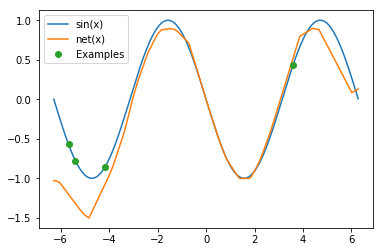

In [13]:
test_x = torch.arange(-2*math.pi, 2*math.pi, step=0.01).unsqueeze(1)
test_y = torch.sin(test_x + t_b)

test_f = net(test_x, t_params)

plt.plot(test_x.data.numpy(), test_y.data.numpy(), label='sin(x)')
plt.plot(test_x.data.numpy(), test_f.data.numpy(), label='net(x)')
plt.plot(t_x.data.numpy(), t_y.data.numpy(), 'o', label='Examples')
plt.legend()
plt.savefig('maml-sine.png')